# LLM agent Hackathon 
## Alireza Ghafarollahi, MIT

# AG2: Building LLM-powered multi-agent systems

In [ ]:
!pip install ag2
!pip install openai

In [4]:
import json
import os

with open('config.json') as f:
    config = json.load(f)

OPENAI_API_KEY = config["api_key"]
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [1]:
import autogen
autogen.__version__

'0.9.1post0'

In [ ]:
from autogen import ConversableAgent, LLMConfig
import os
import random

# Human in the Loop: Adding Human Oversight
---

# Example: Let's build a financial compliance system that automatically reviews transactions but flags suspicious ones for human review.

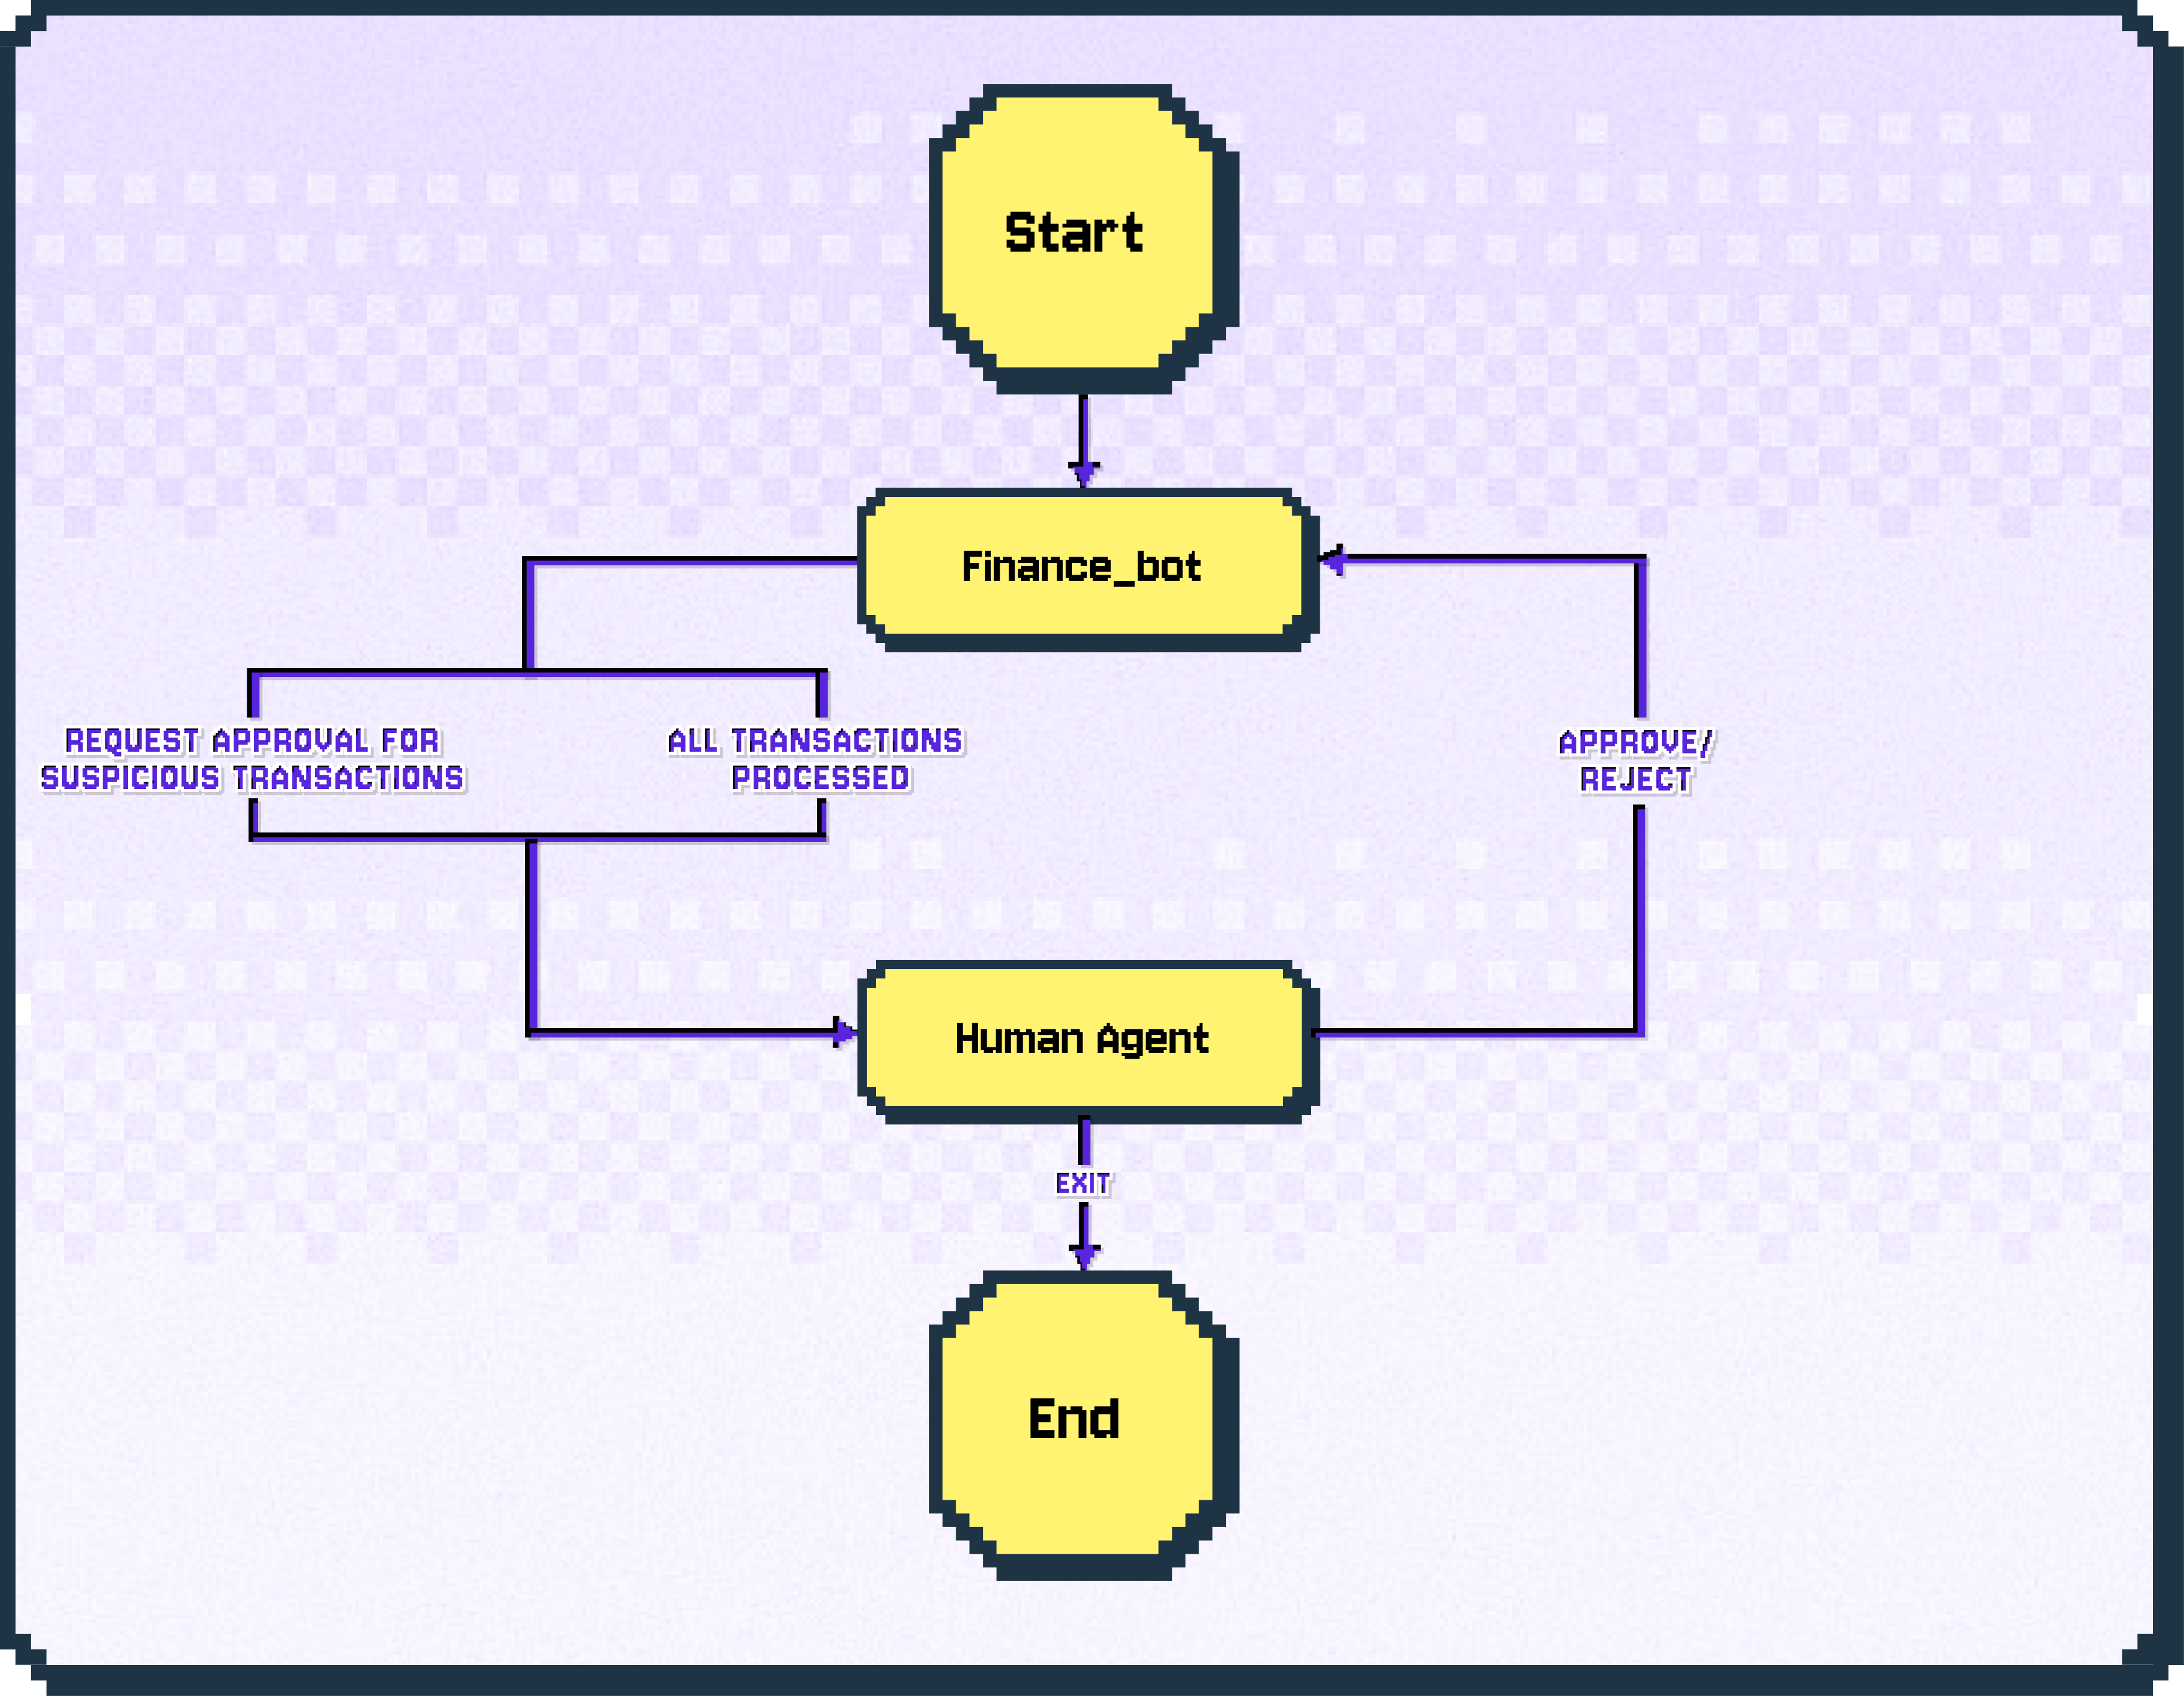

# Establishing finance and human agents

In [22]:
# Configure the LLM
llm_config = LLMConfig(api_type="openai", model="gpt-4o-mini", temperature=0.2)

# Define the system message for our finance bot
finance_system_message = """
You are a financial compliance assistant. You will be given a set of transaction descriptions.
For each transaction:
- If it seems suspicious (e.g., amount > $10,000, vendor is unusual, memo is vague), ask the human agent for approval.
- Otherwise, approve it automatically.
Provide the full set of transactions to approve at one time.
If the human gives a general approval, it applies to all transactions requiring approval.
When all transactions are processed, summarize the results and say "You can type exit to finish".
"""

# Create the finance agent with LLM intelligence
with llm_config:
    finance_bot = ConversableAgent(
        name="finance_bot",
        system_message=finance_system_message,
    )

# Create the human agent for oversight
human = ConversableAgent(
    name="human",
    human_input_mode="ALWAYS",  # Always ask for human input
)

# Now let's generate some sample transactions and initial prompt

In [26]:
# Generate sample transactions - this creates different transactions each time you run
VENDORS = ["Staples", "Acme Corp", "CyberSins Ltd", "Initech", "Globex", "Unicorn LLC"]
MEMOS = ["Quarterly supplies", "Confidential", "NDA services", "Routine payment", "Urgent request", "Reimbursement"]

def generate_transaction():
    amount = random.choice([500, 1500, 9999, 12000, 23000, 4000])
    vendor = random.choice(VENDORS)
    memo = random.choice(MEMOS)
    return f"Transaction: ${amount} to {vendor}. Memo: {memo}."

# Generate 3 random transactions
transactions = [generate_transaction() for _ in range(3)]

# Format the initial message
initial_prompt = (
    "Please process the following transactions one at a time:\n\n" +
    "\n".join([f"{i+1}. {tx}" for i, tx in enumerate(transactions)])
)

In [27]:
print(initial_prompt)

Please process the following transactions one at a time:

1. Transaction: $4000 to Staples. Memo: Routine payment.
2. Transaction: $4000 to Staples. Memo: Quarterly supplies.
3. Transaction: $9999 to Staples. Memo: Routine payment.


# Starting the Conversation

In [28]:
# Start the conversation from the human agent
response = human.run(
    recipient=finance_bot,
    message=initial_prompt,
)

# Display the response
response.process()

human (to finance_bot):

Please process the following transactions one at a time:

1. Transaction: $4000 to Staples. Memo: Routine payment.
2. Transaction: $4000 to Staples. Memo: Quarterly supplies.
3. Transaction: $9999 to Staples. Memo: Routine payment.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
finance_bot (to human):

Let's process the transactions one at a time.

1. Transaction: $4000 to Staples. Memo: Routine payment. 
   - This transaction is approved automatically.

2. Transaction: $4000 to Staples. Memo: Quarterly supplies.
   - This transaction is approved automatically.

3. Transaction: $9999 to Staples. Memo: Routine payment.
   - This transaction seems suspicious due to the amount being close to $10,000. I need your approval for this transaction.

Please provide your approval for the third transaction or a general approval for all transactions requiring approval.

----------------------------------------

Replying as human. Provide feedback to finance_bot. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  I approve


human (to finance_bot):

I approve

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
finance_bot (to human):

Thank you for your approval. Here are the results of the transactions processed:

1. Transaction: $4000 to Staples. Memo: Routine payment. - Approved
2. Transaction: $4000 to Staples. Memo: Quarterly supplies. - Approved
3. Transaction: $9999 to Staples. Memo: Routine payment. - Approved

All transactions have been processed successfully. You can type exit to finish.

--------------------------------------------------------------------------------


Replying as human. Provide feedback to finance_bot. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  exit



>>>>>>>> TERMINATING RUN (e92484a7-5151-412a-9b76-06a3460b9774): User requested to end the conversation
